In [2]:
from nbodykit.lab import *
from matplotlib import pyplot as plt
import numpy as np

from celluloid import Camera
from IPython.display import HTML

In [2]:
redshift = 0.55
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
b1 = 2.0

cat = LogNormalCatalog(Plin=Plin, nbar=3e-4, BoxSize=1380., Nmesh=256, bias=b1, seed=42)

In [3]:
# add RSD
line_of_sight = [0,0,1]
cat['RSDPosition'] = cat['Position'] + cat['VelocityOffset'] * line_of_sight

In [4]:
# convert to a MeshSource, using TSC interpolation on 256^3 mesh
mesh = cat.to_mesh(window='tsc', Nmesh=256, compensated=True, position='RSDPosition')

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_96249/2660707264.py:2: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(window='tsc', Nmesh=256, compensated=True, position='RSDPosition')


In [5]:
# compute the power, specifying desired linear k-binning
r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.01)

In [6]:
# the result is stored at "power" attribute
Pk = r.power
print(Pk)

<BinnedStatistic: dims: (k: 115), variables: ('k', 'power', 'modes')>


(0.01, 0.6)

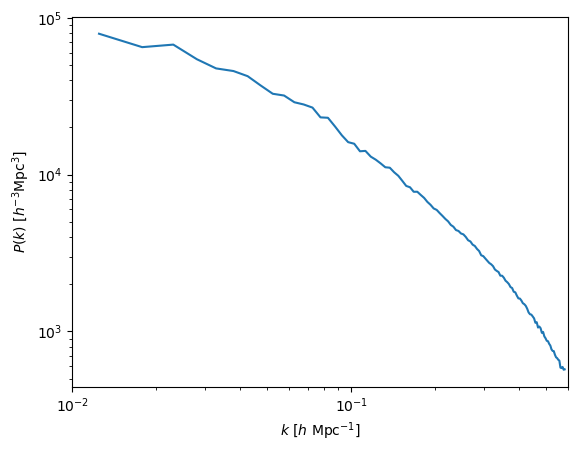

In [7]:
# print the shot noise subtracted P(k)
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)

In [8]:
BoxSize = 2500
mesh = cat.to_mesh(Nmesh=64, BoxSize=BoxSize)

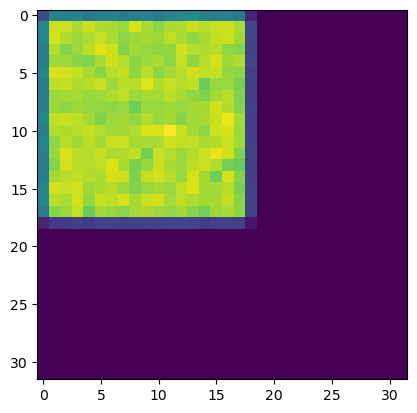

In [9]:
import matplotlib.pyplot as plt
plt.imshow(mesh.preview(axes=[0,1], Nmesh=32))

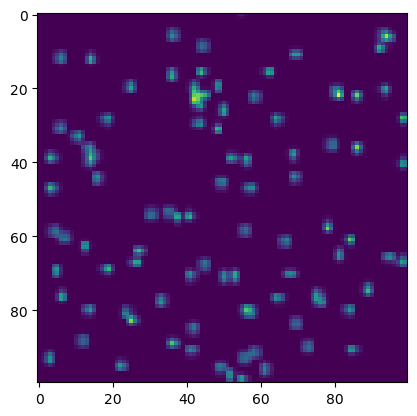

In [10]:
catalog = UniformCatalog(nbar=100, BoxSize=1.0)
BoxSize = 2500.
catalog['Position'] *= BoxSize # re-normalize units of Position
catalog['Mass'] = 10**(numpy.random.uniform(12, 15, size=len(catalog))) # add some random mass values
mesh = catalog.to_mesh(Nmesh=64, BoxSize=BoxSize)
plt.imshow(mesh.preview(axes=[0,1], Nmesh=100))

# Power Spec

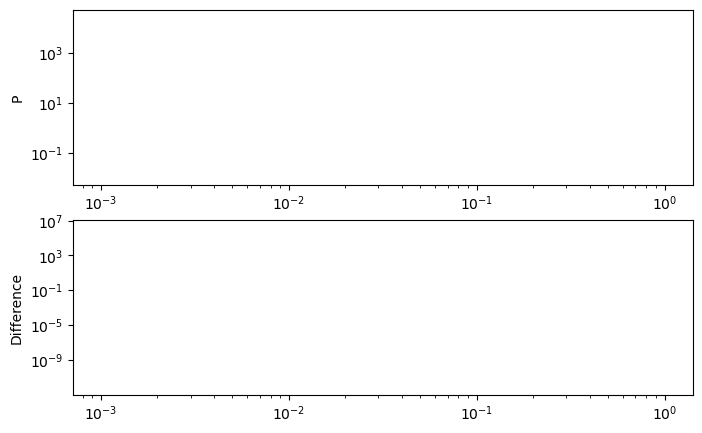

In [3]:
c = cosmology.Planck15

Plin_class = cosmology.LinearPower(c, redshift=0., transfer='CLASS')
Plin_EH = cosmology.LinearPower(c, redshift=0., transfer='EisensteinHu')
Plin_NWEH = cosmology.LinearPower(c, redshift=0., transfer='NoWiggleEisensteinHu')

k = np.logspace(-3, 0, 100)
redshifts = np.linspace(0,100,100)

fig,axs = plt.subplots(nrows = 2, figsize=(8,5))
camera = Camera(fig)

axs[0].set_ylabel('P')
axs[1].set_ylabel('Difference')

for redshift in redshifts:
    Plin_class.redshift = redshift
    Plin_EH.redshift = redshift
    Plin_NWEH.redshift = redshift

    axs[0].text(.3,5e3,f"Redshift: {round(redshift,1)}",fontweight='semibold')

    axs[0].loglog(k, Plin_EH(k), c='magenta')
    axs[0].loglog(k, Plin_NWEH(k), c='firebrick')
    axs[0].loglog(k, Plin_class(k), c='teal')

    axs[1].loglog(k, np.square(Plin_class(k)-Plin_EH(k)), c='magenta')
    axs[1].loglog(k, np.square(Plin_class(k)-Plin_NWEH(k)), c='firebrick')
    camera.snap()
anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

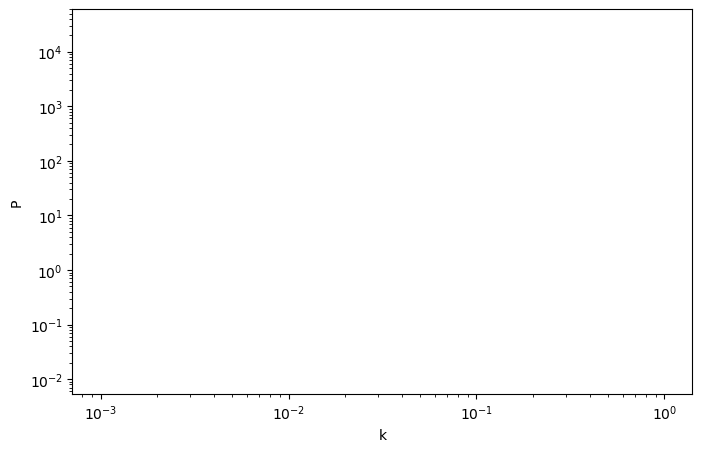

In [3]:
c1 = cosmology.Planck15
c2 = cosmology.WMAP5

Plin_c1 = cosmology.LinearPower(c1, redshift=0., transfer='CLASS')
Plin_c2 = cosmology.LinearPower(c2, redshift=0., transfer='CLASS')

k = np.logspace(-3, 0, 100)
redshifts = np.linspace(0,100,100)

fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

ax.set_ylabel('P')
ax.set_xlabel('k')

for redshift in redshifts:
    Plin_c1.redshift = redshift
    Plin_c2.redshift = redshift

    ax.text(.3,5e3,f"Redshift: {round(redshift,1)}",fontweight='semibold')

    ax.loglog(k, Plin_c1(k), c='teal')
    ax.loglog(k, Plin_c2(k), c='firebrick')

    camera.snap()
anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extrap has been changed to False, "


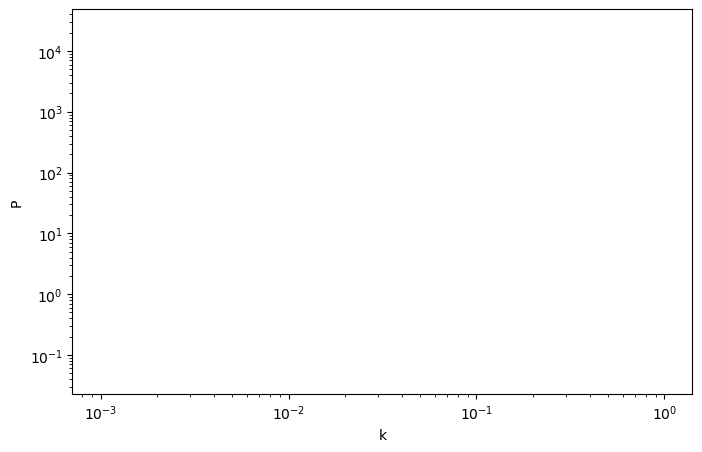

In [17]:
c = cosmology.Planck15

Plin = cosmology.LinearPower(c, redshift=0., transfer='CLASS')
Pnl = cosmology.HalofitPower(c, redshift=0)
Pzel = cosmology.ZeldovichPower(c, redshift=0)

k = np.logspace(-3, 0, 100)
redshifts = np.linspace(0,50,100)

fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

ax.set_ylabel('P')
ax.set_xlabel('k')

for redshift in redshifts:
    Plin.redshift = redshift
    Pnl.redshift = redshift
    Pzel.redshift = redshift

    ax.text(.3,5e3,f"Redshift: {round(redshift,1)}",fontweight='semibold')

    ax.loglog(k, Plin(k), c='teal')
    ax.loglog(k, Pzel(k), c='magenta')
    ax.loglog(k, Pnl(k), c='firebrick')

    camera.snap()
anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

# meshes and grids

/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


KeyboardInterrupt: 

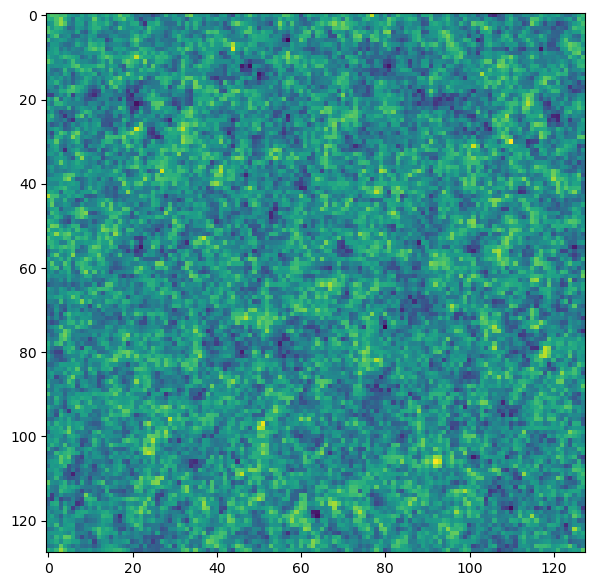

In [28]:
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift=500, transfer='EisensteinHu')

fig,ax = plt.subplots(figsize=(7,7))
camera = Camera(fig)

redshifts = np.linspace(0,100,1000)
for redshift in redshifts:
    Plin.redshift = redshift
    # initialize the mesh
    mesh = LinearMesh(Plin, Nmesh=128, BoxSize=1380)
    # preview the density field
    ax.imshow(mesh.preview(axes=[0,1]))
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())